# Reinforcement Learning in Python

## 2. Optimistic initial value

Here we see the epsilon greedy algorithm for solving the explore exploit dilemma of multi-armed bandit problem, but with an optimistic initial value.

We set the initial mean to a true to be high value. Eventually the mean will convergr to true valule. 

Then we just remove the epsilon part (exploration part) and we will keep only the greedy part (exploitation).
If a bandit remains unexplored, it's mean will remain high and we will be forced to exploit it ensuring quick convergence (till the one with highest mean becomes best greedy option).

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
class Bandit():
    '''
    m: True mean
    N: Number of samplings done
    mean: Calculated mean
    '''
    # constructor
    def __init__(self, m, optimistic_initial_value=10):
        self.m = m
        self.mean = optimistic_initial_value
        self.N = 0
    
    # random pull 
    def pull(self):
        return np.random.randn()+self.m
    
    # updating mean
    def update(self, x):
        self.N += 1
        self.mean = (1-1.0/self.N)*self.mean + 1.0/self.N * x

In [3]:
# Experiment to compare three different bandits 
optimistic_initial_value = 10
def run_experiment(m1, m2, m3, N, optimistic_initial_value=optimistic_initial_value):
    '''
    m1, m2, m3: absolute mean of 3 bandits
    eps: probability with which exploration is done
    N: total number of trials
    '''
    bandits = [Bandit(m1, optimistic_initial_value), 
               Bandit(m2, optimistic_initial_value), 
               Bandit(m3, optimistic_initial_value)]
    
    # a new array of length N, without initializing entries
    data = np.empty(N)
    
    for i in range(N):
        # optimistic initial value 
        j = np.argmax([b.mean for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)
        
        # for the plot
        data[i] = x
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)
    
    # plot moving average ctr
    plt.plot(cumulative_average)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.title('initial value = 10')
    plt.show()
    
    for b in bandits:
        print(b.mean)
    return cumulative_average           

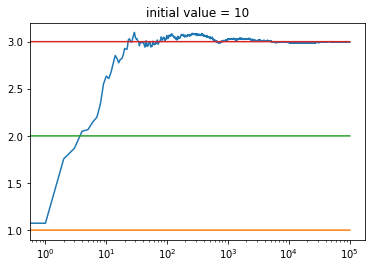

1.986238078405679
0.15975073613649826
2.995577504155511


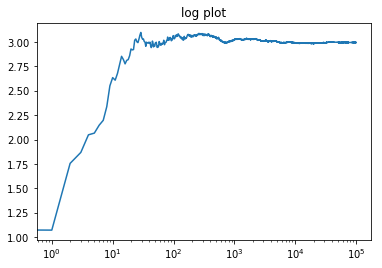

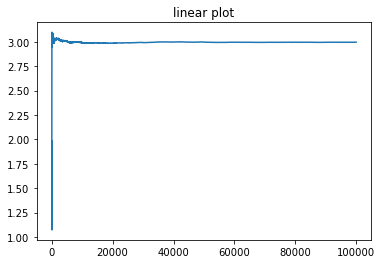

In [6]:
if __name__=='__main__':
    c_10 = run_experiment(1.0, 2.0, 3.0, 100000, 10)
    
    # log scale plot
    plt.plot(c_10)
    # plt.legend()
    plt.xscale('log')
    plt.title('log plot')
    plt.show()
    
    # linear plot
    plt.plot(c_10)
    # plt.legend()
    plt.title('linear plot')
    plt.show()
    